# Exercises for the 16th March 2021

Kim Antunez

<mark>Ces exercices portent principalement sur les 2 premiers exercices vus en classe lors de la dernière séance.</mark> 

# Exercise 1 : ER graphs

In [55]:
import networkx as nx
import random

import matplotlib.pyplot as plt

import itertools #package utile pour faire des analyses

import numpy as np
from networkx.drawing.nx_agraph import graphviz_layout as layout

random.seed(1)

## 1. 10 replicas of ER graphs 

<mark>1-Generate 10 replicas of ER graphs with N=1000 nodes and connection probabilities p=[0.00005, 0.0001, 0.0002, 0.001, 0.002,0.005, 0.01,0.015, 0.02]</mark>

In [4]:
# parameters
N=1000
pList=[0.00005,0.0001,0.0002,0.001,0.002,0.005,0.01,0.015,0.02]
nRepl=10 #je répète mon expérience 10 fois

On construit un modèle (avec différentes réplications) pour chaque valeur de p. 
On doit donc faire deux boucles.
1. un sur les probabilités
2. une sur les réplications

La meilleure chose à faire est de générer tous les graphes  en amont pour ne pas avoir à les recréer si on cherche à réaliser d'autres mesures. 

In [5]:
print("Nombre de graphes à générer : ",len(pList)*nRepl)

Nombre de graphes à générer :  90


In [8]:
# the list of graphs is now a dictionary: I will have a list for each value of the parameter p
listGraphs={}

#loop on the values for the parameter p
for p in pList:
    #print (p) #to be sure that I'm not too slow
    listGraphs[p]=[]
    #loop on the replicas
    for i in range(nRepl):
        G=nx.erdos_renyi_graph(N,p)
        listGraphs[p].append(G)

## 2. Show  $\langle k\rangle=Np$

<mark>2- show visually and with a linear fit that $\langle k\rangle=Np$</mark>

Je veux créer une liste où j'obtiens pour chaque p la **moyenne du degré moyen** sur 10 réplications. 

In [26]:
avK=[]
for p in pList:
    thisAverage=[]
    for G in listGraphs[p]:
        avK_G = np.mean([degree for node, degree in G.degree()])
        thisAverage.append(avK_G)
    print(p, np.mean(thisAverage))
    avK.append(np.mean(thisAverage))

5e-05 0.044
0.0001 0.09740000000000001
0.0002 0.2136
0.001 0.9960000000000001
0.002 1.9952
0.005 4.9878
0.01 10.039000000000001
0.015 14.912199999999999
0.02 19.860599999999998


Je trace la relation entre p et le degré moyen. C'est linéaire. Je le vois en faisant un fit. 

In [30]:
coef = np.polyfit(pList,avK, 1) #1 c'est le degré : linéaire
poly1d_fn = np.poly1d(coef) 

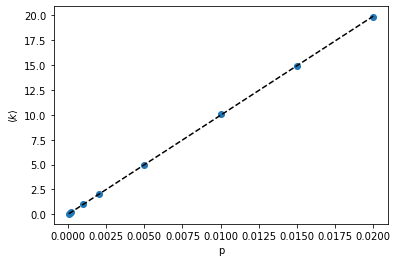

In [31]:
plt.plot(pList,avK,'o')
plt.plot(pList, poly1d_fn(pList), '--k')

plt.xlabel('p')
plt.ylabel(r'$\langle k\rangle$')

plt.show()

On retrouve bien la relation linéaire présentée dans le cours à savoir : 

$$\langle k\rangle= p(N-1)$$

In [34]:
coef[0]

994.1272672026333

In [35]:
(N-1)

999

## 3. Giant component

<mark>3- Are the networks connected? Which is the size of the giant component?  Plot size of the giant component as a function of p. What do you observe?</mark>

Tout d'abord quelques définitions sur ce que sont les composantes et en particulier la composante géante. 

Une **composante** est un sous graphe dans lesquels il y a un chemin qui relie chaque paire de noeuds. Elles ressemblent à des petites îles au sein du graphe et ne sont, par définition, par reliées entre elles. L'exemple suivant comporte 3 composantes. 

![](https://qph.fs.quoracdn.net/main-qimg-8eea92c00b763dc167745c3f06cfe5bd)

La **composante géante** est une composante qui comporte beaucoup plus de noeuds que les autres composantes du graphe, elle ne se définit pas vraiment mathématiquement par un certain seuil, il s'agit davantage d'un concept. 

[Source](https://www.quora.com/What-is-the-giant-component-in-graph-theory)

Nous générons à titre d'exemple un graphe et représentons avec un trait épais et rouge sa composante la plus grande. 

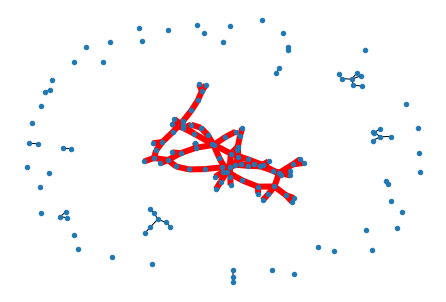

In [63]:
# inspiré de https://networkx.org/documentation/stable//auto_examples/drawing/plot_giant_component.html
G = nx.binomial_graph(150, 0.01)
# on fixe la position du réseau pour le graphe
pos=nx.spring_layout(G)
# On récupère les composantes et on les trie par ordre décroissant du nombre de noeud
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
# Donc la première composante est donc la composante ayant le plus grand nombre de noeud
#(potentiellement giant)
G0 = G.subgraph(Gcc[0])
nx.draw(G, pos, with_labels=False, node_size=20)
nx.draw_networkx_edges(G0, pos, edge_color="r", width=6.0)

Retour à nos graphes de la question 2. Cherchons à évaluer la relation entre p et la moyenne de la composante la plus grande des graphes. 

Je veux créer une liste où j'obtiens pour chaque p la **moyenne du nombre de noeuds de la plus grande composante** sur 10 réplications. 

Nous en tirons de premières remarques : 

- A partir de $p= \frac{1}{N} = 0.001$, la taille de la plus grande composante se met soudainement à augmenter, comme s'il existait un effet de seuil. 

- A partir de $p = 0.01$, le graphe devient connecté puisque la taille de sa plus grande composante est de $N=1000$. Pour des probabilités inférieures, le graphe n'était donc pas connecté.  


In [69]:
avG=[]
for p in pList:
    thisAverage=[]
    for G in listGraphs[p]:
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        giant_nb_nodes = G.subgraph(Gcc[0]).number_of_nodes()
        thisAverage.append(giant_nb_nodes)
    print(p, np.mean(thisAverage))
    avG.append(np.mean(thisAverage))

5e-05 2.7
0.0001 3.4
0.0002 5.4
0.001 94.0
0.002 790.4
0.005 992.7
0.01 1000.0
0.015 1000.0
0.02 1000.0


Je trace la relation entre p et la taille moyenne de la plus grande composante. Cette fois-ci ce n'est pas du tout linéaire. 

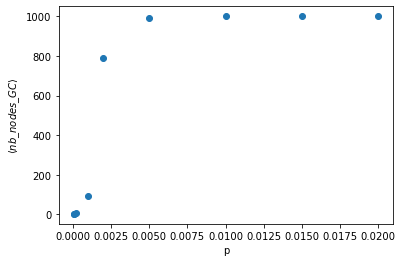

In [85]:
plt.plot(pList,avG,'o')
plt.xlabel('p')
plt.ylabel(r'$\langle nb\_nodes\_GC\rangle$')

plt.show()

Nous avons la confirmation empirique de l'élément indiqué dans [cet article](https://www.quora.com/What-is-the-giant-component-in-graph-theory) : "Dans un graphe de Erdos–Renyi, si $p>\frac{1}{N}$ alors il y a probablement une composante géante et si $p<\frac{1}{N}$ il n'y en a probablement pas.". Ci-dessous quelques dernières simulations en faisant varier p autour de $\frac{1}{N}$ pour nous en convaincre ! 

In [97]:
pList2 = [0.0007,0.0008,0.0009,0.0011,0.0012,0.0013]

listGraphs2={}
for p in pList2:
    listGraphs2[p]=[]
    for i in range(nRepl):
        G=nx.erdos_renyi_graph(N,p)
        listGraphs2[p].append(G)

In [100]:
avG2=[]
for p in pList2:
    thisAverage=[]
    for G in listGraphs2[p]:
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        giant_nb_nodes = G.subgraph(Gcc[0]).number_of_nodes()
        thisAverage.append(giant_nb_nodes)
    if p==0.0011:
        print("Effet de seuil à 0.0010 !")
    print(p, np.mean(thisAverage))
    avG2.append(np.mean(thisAverage))

0.0007 24.6
0.0008 32.3
0.0009 59.2
Effet de seuil à 0.0010 !
0.0011 165.8
0.0012 264.9
0.0013 378.5


# COMPARISON WITH REAL NETWORKS

1- Take the twitch networks from last lesson. Calculate their average clustering coefficient. Calculate the average clustering coefficient for several replicas of a random graph with the same number of nodes and the same number of edges (using p=2E/N(N-1) ) of the twich networks. Compare the real values and the random values. What do you observe? How can you interpret this?

OPTIONAL: perform a significance test to see if the value observed in real networks is equal to the value observed in the random case. 

2- OPTIONAL A better way to randomize network structures consists in rewiring the links preserving the degree structure:

(1) take two links (n1,n2) and (n3,n4). 

(2)exchange one of the extremes in order to have (n1,n4) and (n3,n2)

(3) Iterate this procedure for a number of times proportional to the number of edges

Write the script performing this procedure and apply this to one of the Twitch networks. 




<mark>On cherche à utiliser des réseaux aléatoires. On regarde les réseaux twitch de la dernière fois (France, Portugal, les deux ensemble comme on veut). On calcule l’erreur clustering moyenne et ensite l’average clustering pour un graphe aléatoire qui a le même nombre de nœuds et de liens et on fait la comparaison entre les valeurs obtenus du clustering pour le réseau réel et réseau aléatoire. Si on sait le faire, on peut faire si on veut un test (significativité) pour voir comment comparer ces valeurs (mais ça c’est pas obligatoire). 
Dernière chose : algorithme qui correspond à une possibilité de changer structure des réseau sans changer [réécouter] et réaliser cet algorithme sur le réseau twitch</mark>